In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("2023-06-25_data_cleaned_enhanced_data_no_outliers.csv")

In [8]:
# create a map centered on the first listing's latitude and longitude
map = folium.Map(location=[data['Latitude'][0], data['Longitude'][0]], zoom_start=12)

# add a marker for each listing
for index, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(map)

# display the map
map

In [3]:
# Create a map centered around the average coordinates
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Create a list of [latitude, longitude, weight] for the HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Celková cena']] for index, row in data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=40, blur=15, max_val=1.0).add_to(m)


# Display the map
m

/var/folders/2v/zjk16qr55dv34_t6b41l4rph0000gn/T/ipykernel_82874/2349302272.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.1, max_zoom=40, radius=40, blur=15, max_val=1.0).add_to(m)


In [4]:
# Create a map centered around the average coordinates
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Create a list of [latitude, longitude, weight] for the HeatMap
heat_data = [[row['Latitude'], row['Longitude'], row['Užitná plocha']] for index, row in data.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(m)

# Display the map
m

/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


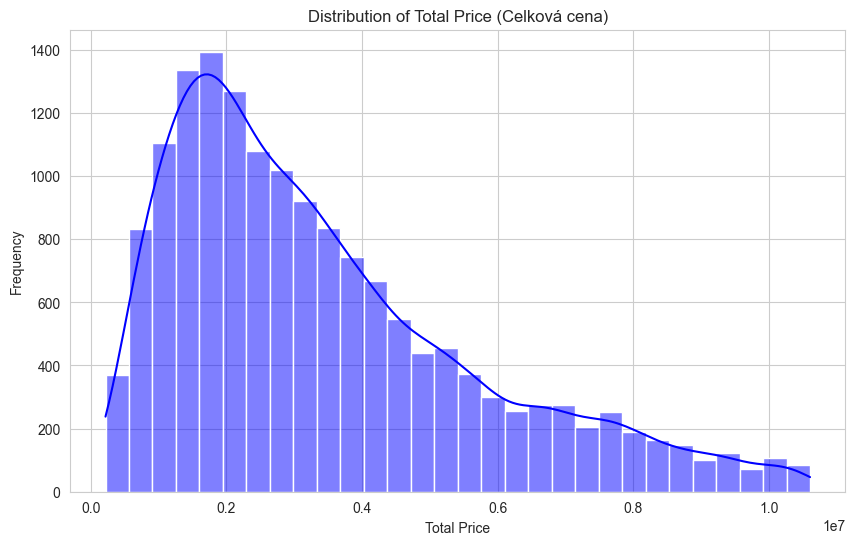

In [5]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot distribution of 'Celková cena'
plt.figure(figsize=(10, 6))
sns.histplot(data['Celková cena'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Price (Celková cena)')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


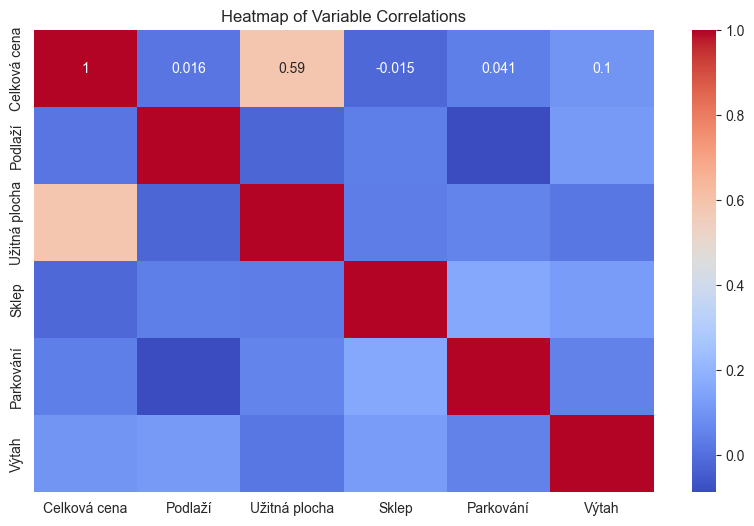

In [6]:
# Subset of the dataframe for correlation analysis
subset = data[['Celková cena', 'Podlaží', 'Užitná plocha', 'Sklep', 'Parkování', 'Výtah']]

# Calculate correlations
corr = subset.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Variable Correlations')
plt.show()


/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


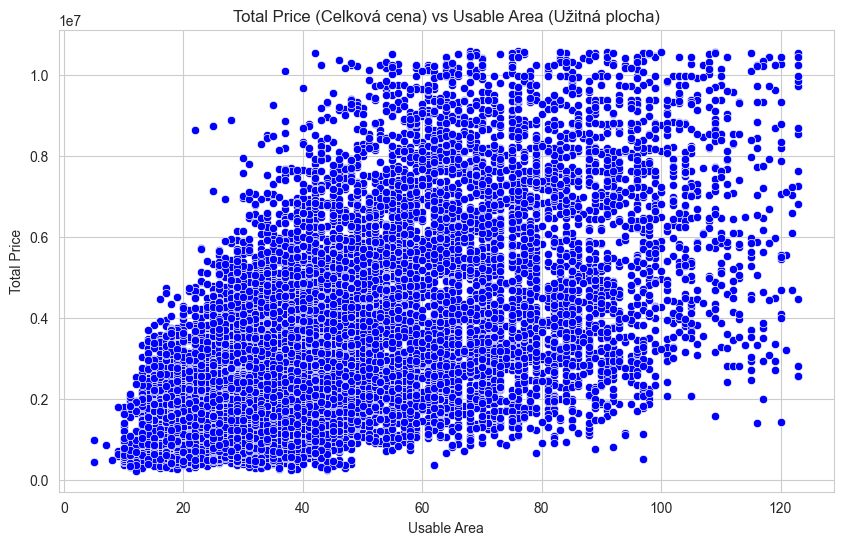

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Užitná plocha', y='Celková cena', data=data, color='blue')
plt.title('Total Price (Celková cena) vs Usable Area (Užitná plocha)')
plt.xlabel('Usable Area')
plt.ylabel('Total Price')
plt.show()


/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


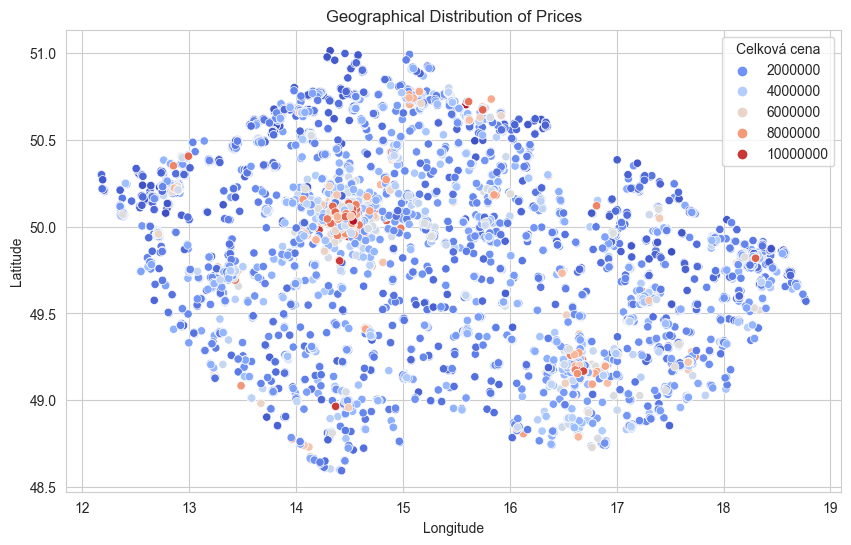

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Celková cena', palette='coolwarm', data=data)
plt.title('Geographical Distribution of Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
